In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as ks
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [5]:
xtrain.dtype

dtype('float64')

In [6]:
ytrain = ks.utils.to_categorical(ytrain, 10)

In [7]:
ytest = ks.utils.to_categorical(ytest, 10)

In [8]:
model = ks.models.Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)

C:\Users\ankur_vc1xnom\Desktop\LP4\dlenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    optimizer = SGD(learning_rate = 0.01), 
    loss = 'categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [10]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 32, validation_data = (xtest, ytest))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6901 - loss: 1.0880 - val_accuracy: 0.9069 - val_loss: 0.3214
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9111 - loss: 0.3111 - val_accuracy: 0.9230 - val_loss: 0.2634
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9277 - loss: 0.2498 - val_accuracy: 0.9381 - val_loss: 0.2166
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9389 - loss: 0.2166 - val_accuracy: 0.9422 - val_loss: 0.1936
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9445 - loss: 0.1886 - val_accuracy: 0.9486 - val_loss: 0.1722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9527 - loss: 0.1651 - val_accuracy: 0.9541 - val_loss: 0.1547
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9575 - loss: 0.1451 - val_accuracy: 0.9587 - val_loss: 0.1424
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.1328 - 

In [11]:
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9572 - loss: 0.1421


In [12]:
print(f'{test_loss:.4f}, {test_accuracy:.4f}')

0.1197, 0.9632


In [13]:
ytest = np.argmax(ytest, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


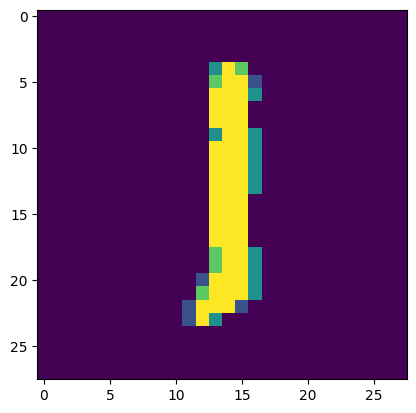

1


In [14]:
ypred = model.predict(xtest)
plt.imshow(xtest[14])
plt.show()
ypred = np.argmax(ypred, axis = 1)
print(ypred[14])

In [15]:
class_report = classification_report(ytest, ypred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.93      0.98      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.98      0.93      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



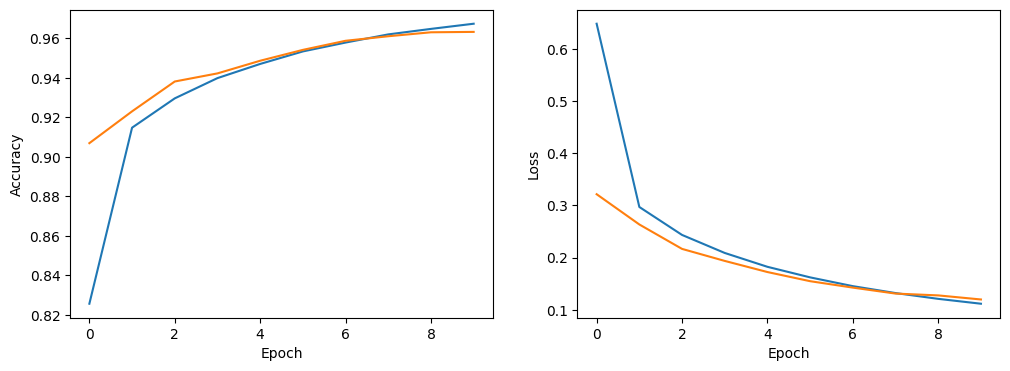

In [16]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()